## CG

In [1]:
import numpy as np

def cg(Q, b, x=None, tol=1e-11, 
       maxit=1000, callback=lambda x: 0):
    # We need to change the sign, if this is supposed to solve Qx = b
    b = -np.array(b).ravel()
    if x is None:
        x = np.ones_like(b)
    else:
        x = np.array(x).ravel()

    Q = np.array(Q)
    assert len(Q.shape) == 2
    assert Q.shape[0] == Q.shape[1]
    assert Q.shape[0] == len(x)
    assert Q.shape[0] == len(b)

    k = 0

    r = Q.dot(x) + b
    p = np.zeros_like(x)
    rTr = r.dot(r)
    beta = 0
    
    while (rTr > tol) and (k < maxit):
        p = - r + beta*p
        Qp = Q.dot(p)
        alpha = rTr / (p.dot(Qp))
        x = x + alpha*p
        r_new = r + alpha*Qp
        rTr_new = r_new.dot(r_new)
        beta = rTr_new / rTr
        
        # Update the variables
        rTr = rTr_new
        r = r_new
        k += 1
        callback(x)
    print(k)

    return x

In [2]:
def test_solver(solver):
    for n in [4]:
        A = np.random.rand(n, n)
        A = np.array(A.T.dot(A))
        x_orig = np.random.rand(n)
        b = A@x_orig

        x = solver(A, b)
        assert all(np.isclose(x, x_orig))

def test_cg_arange():
    n = 300
    b = np.array(np.arange(1, n+1))
    Q = np.array(np.diag(b))
    x = cg(Q, b, x=np.zeros_like(b))

    assert all(np.isclose(b, Q@x))
    assert all(np.isclose(x, np.ones_like(b)))
    
def test_cg_rankdeficient():
    n = 10
    Q = np.eye(n)*2 - np.eye(n, k=-1) - np.eye(n, k=1)
    Q[0,0:2] = [1,-1]
    Q[-1,-2:] = [-1,1]
    print(Q)
    Q /= (n-1)**2
    unit = np.ones(n)/np.sqrt(n)
    
    assert all(np.isclose(Q.dot(unit), np.zeros(n)))

    b = np.arange(1,n+1, dtype=float)
    b -= unit*b.dot(unit)
    x = cg(Q,b)
    
    assert(all(np.isclose(Q@x, b)))
    
    import matplotlib.pyplot as plt
    plt.imshow(Q)
    plt.show()
    
    print("b orig:\t", np.arange(1,n+1, dtype=float))
    print("b:\t", b)
    print("Qx:\t", Q@x)
    print(x)

In [3]:
#test_solver(cg)
test_cg_arange()
#test_cg_rankdeficient()

97


[[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]]
5


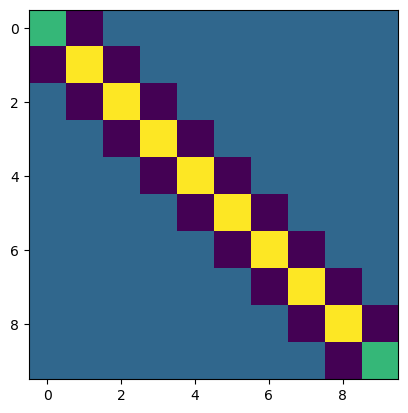

b orig:	 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
b:	 [-4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5]
Qx:	 [-4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5]
[-3340.25 -2975.75 -2327.75 -1477.25  -505.25   507.25  1479.25  2329.75
  2977.75  3342.25]


In [5]:
test_cg_rankdeficient()